<a href="https://colab.research.google.com/github/shaarialwi/Data-analyst/blob/main/kelas360_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#initialize workspace
%matplotlib inline 
%config inlineBackend.figure_format  = 'retina' # display pretty chart for HD monitor
import matplotlib.pyplot as plt #import chart engine

import pandas as pd #import our data analysis library
import seaborn as sns # import our chart library

sns.set() #initialize our chart library

#read our excel file 

df = pd.read_excel("HR_dataset.xlsx")
df.head()

sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=1)

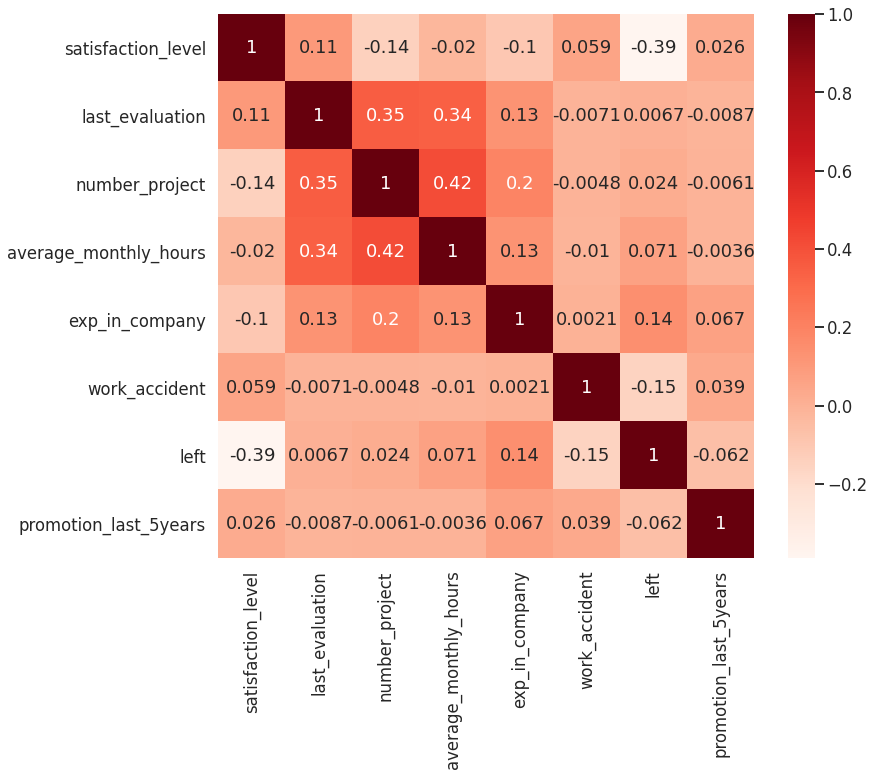

In [9]:
#sns = seaborn    
#corr = correlation
#annot = annotation
sns.heatmap(df.corr(), cmap='Reds', annot=True)

In [10]:
#Statistical analysis
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


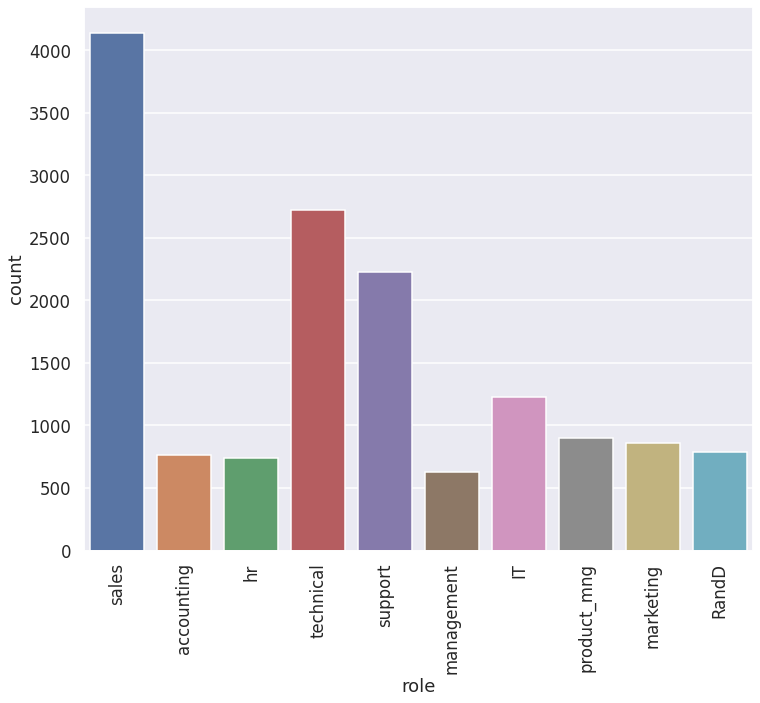

In [15]:
ax= sns.countplot(df['role']) #for counting

#rotate labels
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


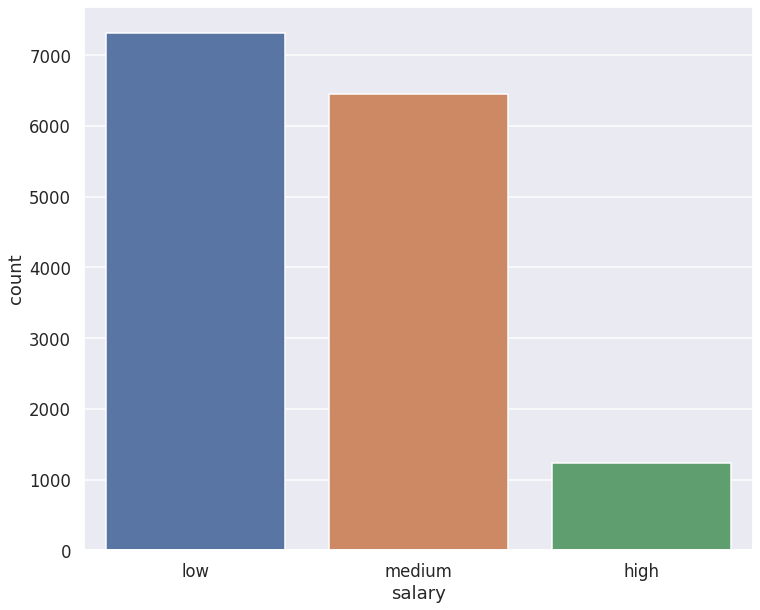

In [14]:
ax= sns.countplot(df['salary'])

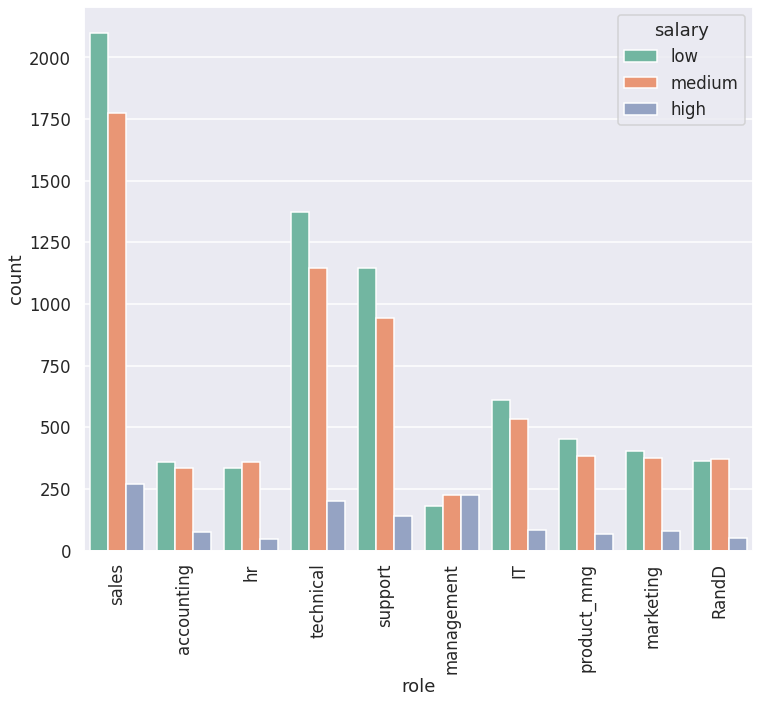

In [16]:
#hue is grouping variable

ax = sns.countplot(x="role", hue="salary", data=df, palette='Set2') #palette is color scheme
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


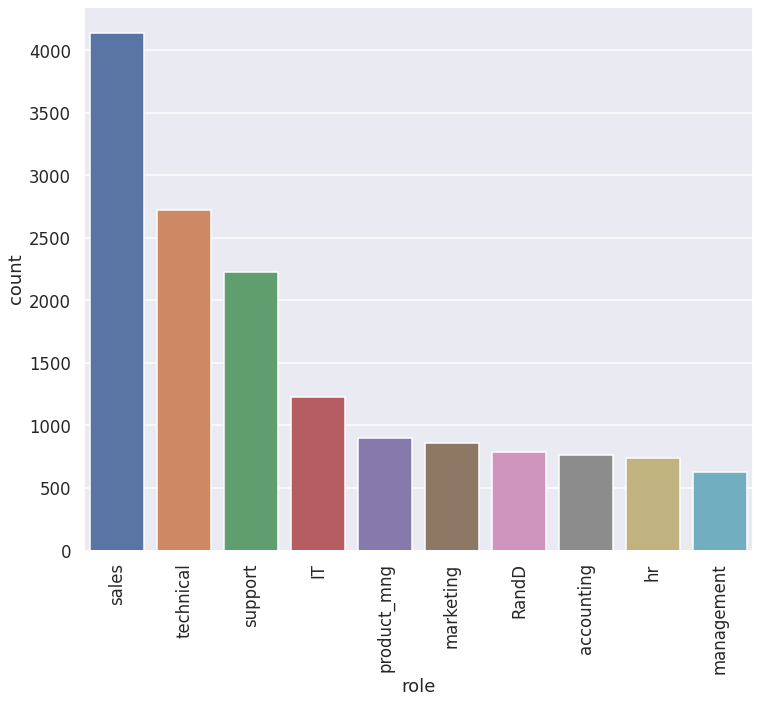

In [17]:
ax = sns.countplot(df['role'], order= df['role'].value_counts().index)

# Rotate our labels
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


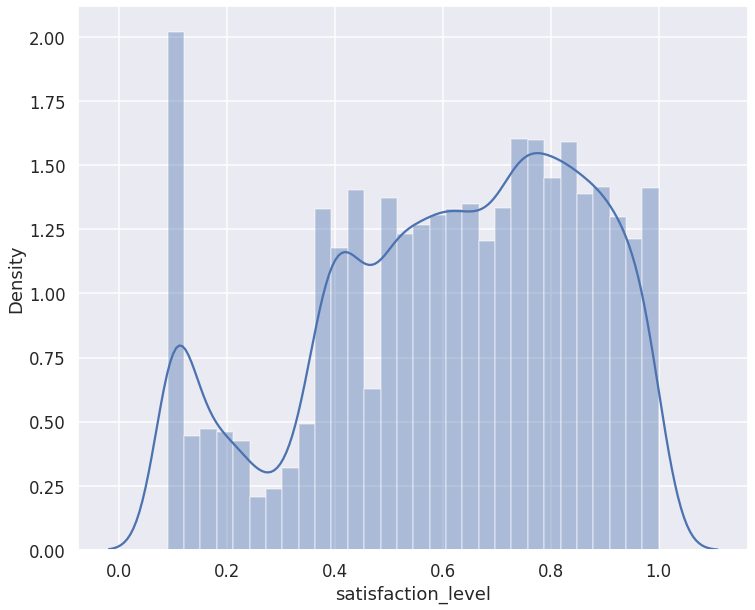

In [18]:
sns.distplot(df['satisfaction_level'], norm_hist=False, kde=True);

In [19]:
columns = ['satisfaction_level','number_project']

# Create our training set
X = df[columns] #kena set column kat atas
y = df['left']

In [20]:
# we will train our logistic regression model

#import the model and evaluation metric (accuracy score)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  

logmodel = LogisticRegression()
logmodel.fit(X,y) # training

predictions = logmodel.predict(X)

accuracy_score(y, predictions) #our accuracy score

0.7736

In [ ]:
# from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score  

#logmodel = LogisticRegression()
#logmodel.fit(X,y) # training

#predictions = logmodel.predict(X)

#accuracy_score(y, predictions)

In [21]:
predict = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/hr_predict.csv")

X_predict = predict[columns]

predictions = logmodel.predict(X_predict)
predict['left_predict'] = predictions
predict

,id,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,role,salary,salary_class,role_class,left_predict
0,2237,Paul Mathey,0.74,0.72,4,176,3,0,0,sales,low,1,1,0
1,8127,Shawn Torres,0.72,0.88,3,224,3,0,0,technical,low,1,2,0
2,8146,Emily Staples,0.52,0.67,4,216,3,0,0,support,medium,2,3,0
3,14441,Jean Salazar,0.42,0.47,2,159,3,0,0,marketing,low,1,6,0
4,11909,Javier Folse,0.85,0.58,4,186,7,0,0,sales,medium,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12162,Robert Davis,0.45,0.51,2,147,3,0,0,sales,low,1,1,0
96,14646,Kevin Reid,0.41,0.47,2,135,3,0,0,support,low,1,3,0
97,10385,Mary Valdez,0.99,0.50,4,173,3,0,0,management,low,1,11,0
98,9524,William Jaeger,0.74,0.55,5,168,4,0,0,management,low,1,11,0
